In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

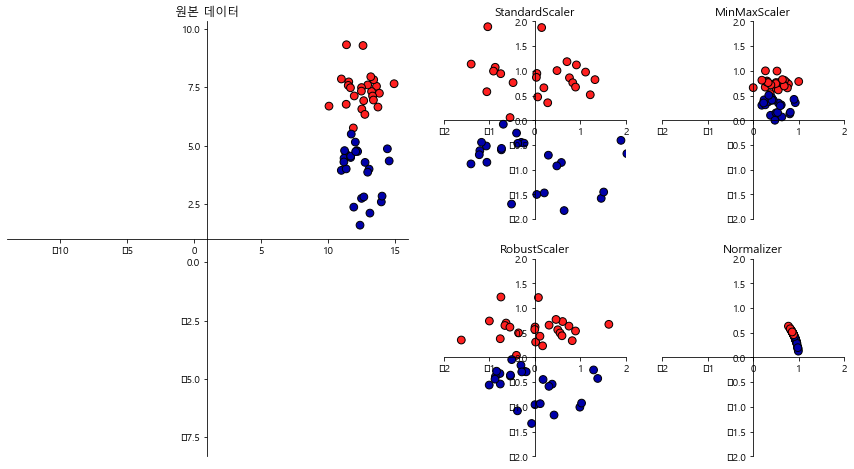

In [7]:
mglearn.plots.plot_scaling()

In [8]:
#비지도 학습 알고리즘은 데이터 과학자가 데이터를 더 잘 이해하고 싶을 때 
#탐색적 분석 단계에서 많이 사용한다.
#비지도 학습은 지도 학습의 전처리 단계에서도 사용합니다.
#위 그림음 데이터셋의 스케일을 조정하거나 전처리하는 여러 방법을 보여줍니다.

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target
                                                    ,random_state=1)
print(X_train.shape)
print(X_test.shape)
 

(426, 30)
(143, 30)


In [10]:
#유방암 데이터를 이용해서 비지도학습을 보겠습니다. 샘플 426개가 훈련세트
#143개가 테스트 세트로 나누어 졌습니다.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#minmaxscaler는 훈련세트에 있는 특성마다 최솟값과 최대값을 계산합니다.
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
print("변환 된 후 크기 :", X_train_scaled.shape)
print("스케일 조정 전 특성별 최솟값:\n",X_train.min(axis=0))
print("스케일 조정 전 특성별 최댓값:\n",X_train.max(axis=0))
print("스케일 조정 후 특성별 최솟값:\n",X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n",X_train_scaled.max(axis=0))


변환 된 후 크기 : (426, 30)
스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [13]:
#transform은 새로운 데이터 표현을 만들 때 사용하는 메서드입니다!!

In [14]:
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최솟값:\n",X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n",X_test_scaled.max(axis=0))


스케일 조정 후 특성별 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [15]:
#여기서 transform은 테스트 세트의 최솟값과 범위를 사용하지 않고
#항상 훈련셑트의 최솟값을 빼고 훈련 세트의 범위로 나눕니다
#X_test_scaled = (X_test-X_train.min(axis=0))/(X_train.max-X_train.min)
#test는 위와 같은 공식으로 바꾸어 주어야 합니다.

In [16]:
#svc를 학습시킬 때 minmaxsclaer의 효과를 확인해 보겠습니다

In [17]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target
                                                    ,random_state=0)
svm = SVC(C=100)
svm.fit(X_train,y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test,y_test)))

테스트 세트 정확도 : 0.94


In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled
                                                    ,y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [19]:
#스케일 조정의 효과는 꽤 좋습니다. 데이터 전처리를 했기 때문에 성능이 더 좋아졌브니다.


In [20]:
#standardScaler의 효과도 보겠습니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print("SVM 테스트 정확도:{:.2f}".format(svm.score(X_test_scaled,y_test)))

SVM 테스트 정확도:0.96


In [21]:
#평균을 0 분산을 1로 만드는 데이터전처리도 높은 성능 보이네요

In [22]:
#차원 축소, 특성 추출, 매니폴드 학습

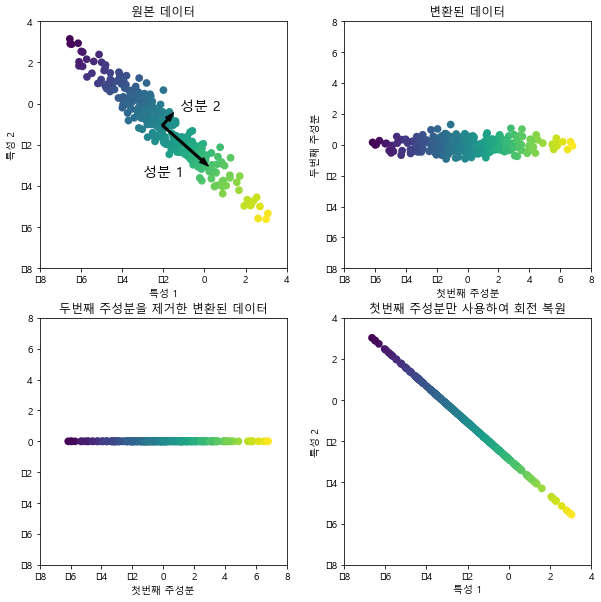

In [23]:
mglearn.plots.plot_pca_illustration()

In [24]:
#위그림은 인위적인 데이터셋을 이용하여 PCA 효과를 나타냅니다.
#성분 1은 분산이 가장 큰 방향을 찾습니다.
#성분 1방향이 가장 많은 정보를 담고 있는 방향입니다.
#PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다.
#일반적으로 원본 특성 개수만큼이 주성분이 있다.

In [25]:
#주성분 분석(PCA)는 고차원에서의 분산 유지하면서 차원을 줄이고
#데이터를 설명의 중요도에 따라 데이터 선택 합니다

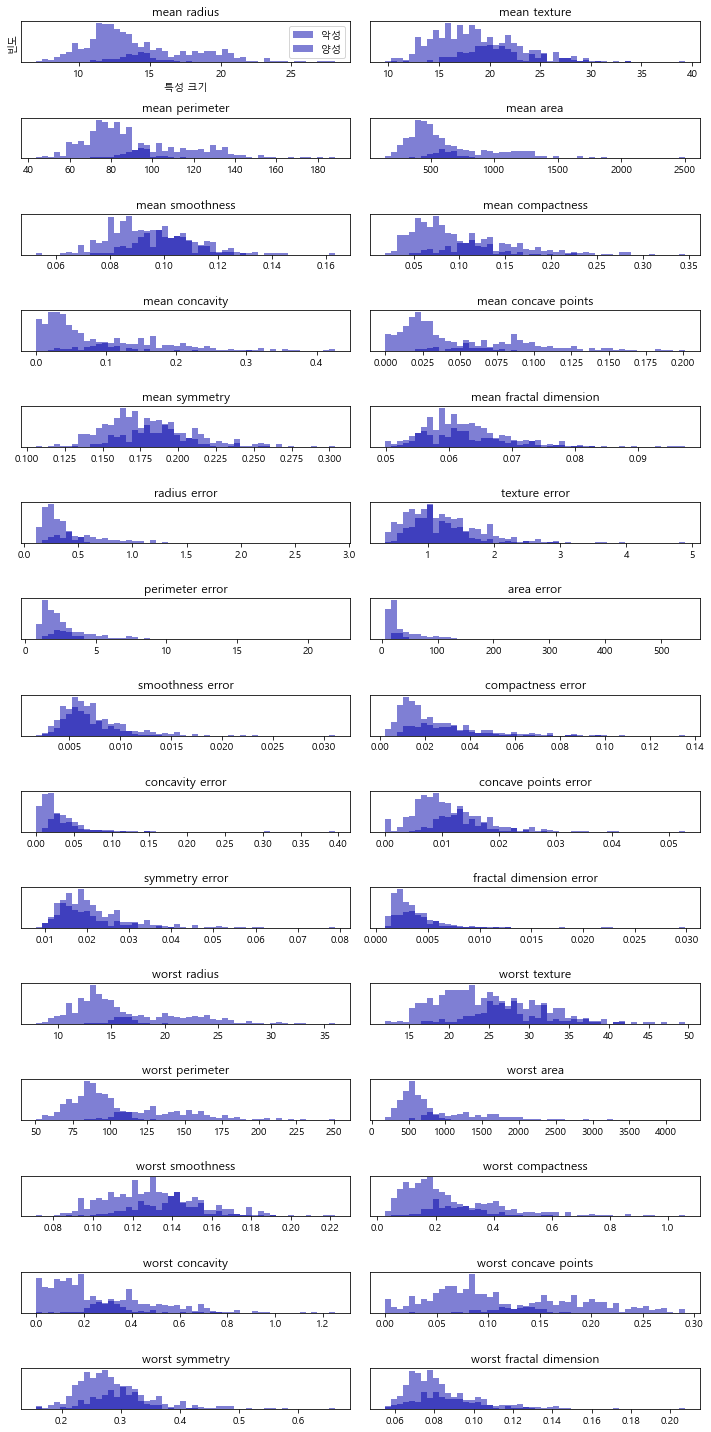

In [26]:
#특성을 30개나 가지고 있는 유방암 데이터들은 산점도로 표현하기 힘듭니다.
#그렇기에 특성 히스토그램을 이용해서 나타냅니다.
fig,axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
    _,bins= np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성","양성"],loc="best")
fig.tight_layout()

In [27]:
#Cancer Data를 통해 주성분 분석을 해보자
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# cancer 데이터로 PCA 모델을 구축
pca.fit(X_scaled)
# 처음 두 개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두번째 주성분')

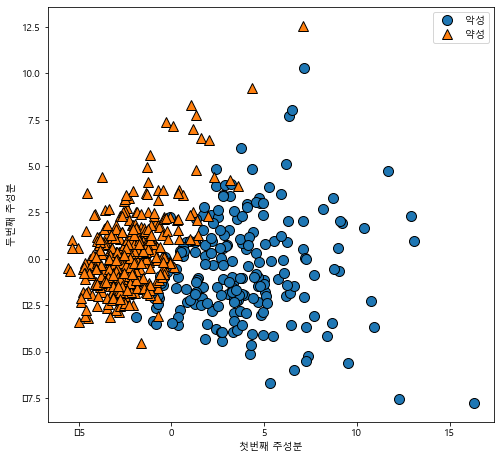

In [28]:
#두개의 주성분을 그립니다
#클래스를 색깔로 구분하여 처음 두개의 주성분을 그래프로 나ㅏ내기

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["악성","약성"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")



In [ ]:
#PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않고
#단순히 데이터에 있는 상관관계만 고려 
#두 크랠스가 2차원 공간에서 꽤 잘 구분되는 것을 볼 수 있다.
#이런 그림이라면 선형 분류기도 두 클래스를 잘 구분할 수 있을 것 같다.


In [31]:
#PCA의 단넘은 그래프의 투 축을 해석하기가 쉽지 않다는 것
#주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태
#PCA.COMPONENTS_ 속성에 주성분이 저장된다.


print("PCA 주성분 형태: ",pca.components_.shape)
print("PCA 주성분: ", pca.components_)

PCA 주성분 형태:  (2, 30)
PCA 주성분:  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

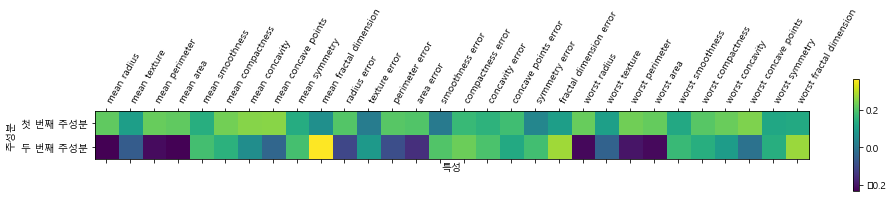

In [33]:
#이 값을 히트맵으로 시각화 하면 이해하기가 쉽다
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["첫 번째 주성분","두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names,rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [ ]:
#첫번째 주성분은 거즘 부호가 같습니다. 이말은 모든 특성 사이에 공통의 상호관계
#가 있다는 뜻입니다.

In [ ]:
#고유얼굴 특성 추출을 해보겠습니다.

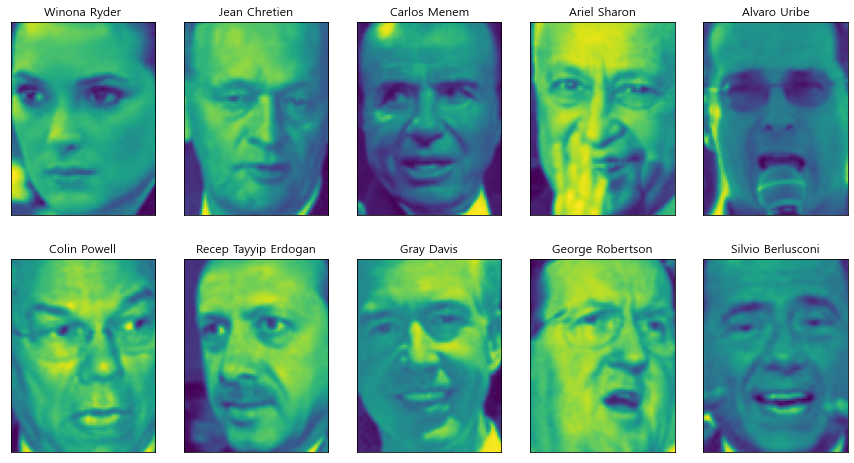

In [34]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5,figsize=(15,8),
                        subplot_kw={'xticks' : (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])




In [37]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target) :
    mask[np.where(people.target == target)[0][:50]]=1
    
X_people = people.data[mask]
y_people = people.target[mask]

#0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 좆정합니다
# MinMaxScaler를 적용하는 것과 거의 같다

X_people =X_people/255.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
 # 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델구축
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))



1-최근접 이웃의 테스트 세트 점수: 0.23


In [ ]:
#1-최근접 이웃의 테스트 세트 점수: 0.28 (무작위 1/45 =2.2%)
# 원본 픽셀에서 거리 계산은 픽셀이 조금만 움직여도 달라진다

In [ ]:
#그리 좋은 결과가 아니여서 PCA가 필요하다 얼굴의 유사도를 측정하기 위해 
#원본 픽셀 공간에서 거리를 계산하는 것은 매우 나쁘다
#주성분으로 변환하여 거리를 계산하면 정확도가 높아질 것 같다


In [39]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_test_pca.shape: {}".format(X_test_pca.shape))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)
테스트 세트 정확도: 0.31


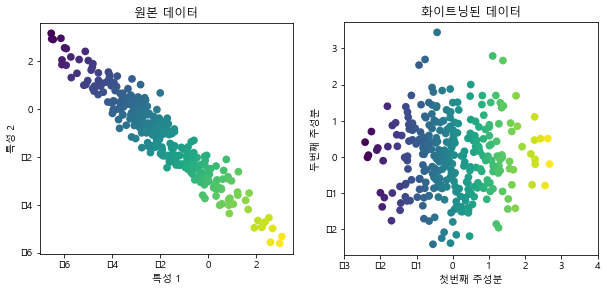

In [40]:
#위와 같은 방법은 pca의 화이트닝을 이용한 것이다 
#주성분에 투영된 특성의 스케일이 같아지도록 조정하는 것이다.
mglearn.plots.plot_pca_whitening()

In [ ]:
#특성간의 공분산이 0, 분산이 1
#상관관계를 작게(중복성을 줄인다., 이미지에서 픽셀주변이 비슷)
#whiten=true  대신 변환한 후에 StandardScaler를 적용하는 것과 동일하다


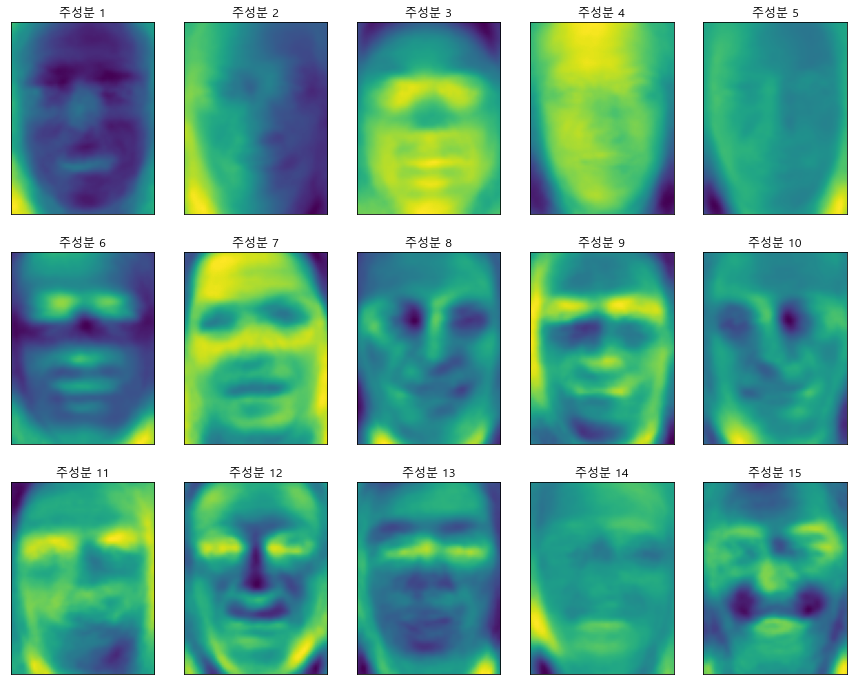

In [41]:
fig, axes = plt.subplots(3,5, figsize=(15,12),
                        subplot_kw= {'xticks':(), 'yticks': ()})
for i , (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

In [ ]:
#위에 보면 주성분들이 잡아낸 얼굴 이미지의 특징을 짐작해 볼 수가 있다.

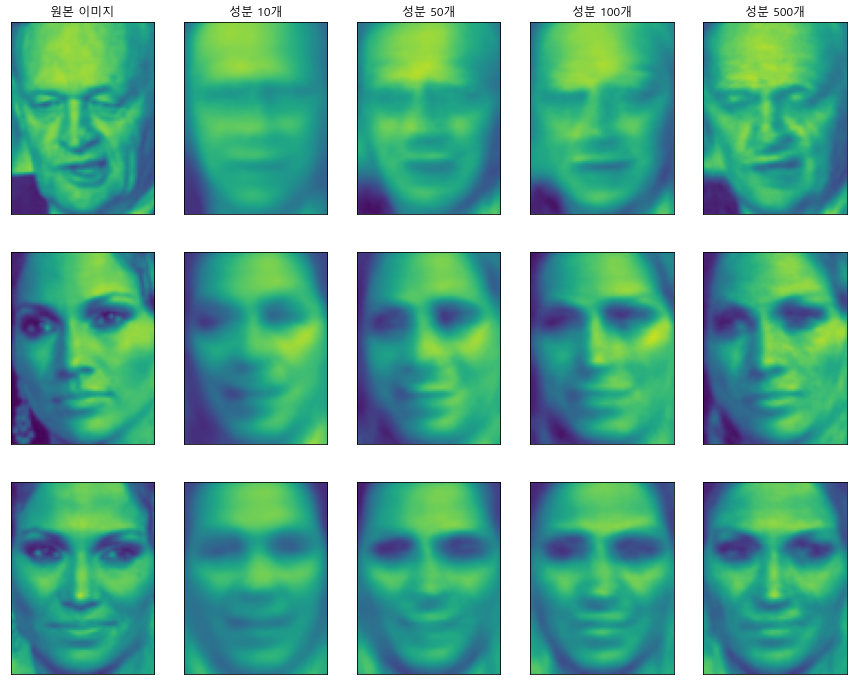

In [42]:
#비음수 행렬 분해(NMF)
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

In [ ]:
#변환을 되돌린 결과는 PCA를 사용했을 때와 비슷하지만 품질이 조금 떨이진다.
#데이터의 유용한 패턴을 찾을 때 활용한다

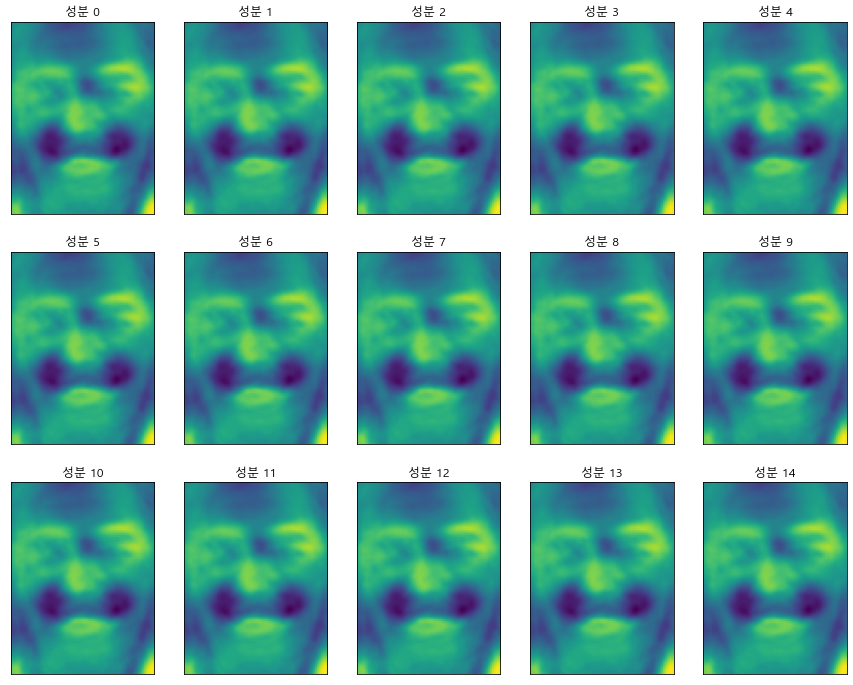

In [47]:
from sklearn.decomposition import NMF
nmf= NMF(n_components = 15, random_state =0, max_iter=1000,tol=1e-2)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5,figsize=(15,12),
                       subplot_kw={'xticks': (),'yticks':()})

for i, (componet, ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

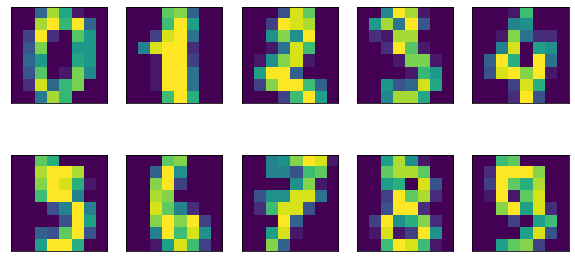

In [49]:
#t_sne를 이용한 매니폴드 학습
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5),
                        subplot_kw= {'xticks':(),'yticks':()})
for ax, img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

Text(0, 0.5, '두 번째 주성분')

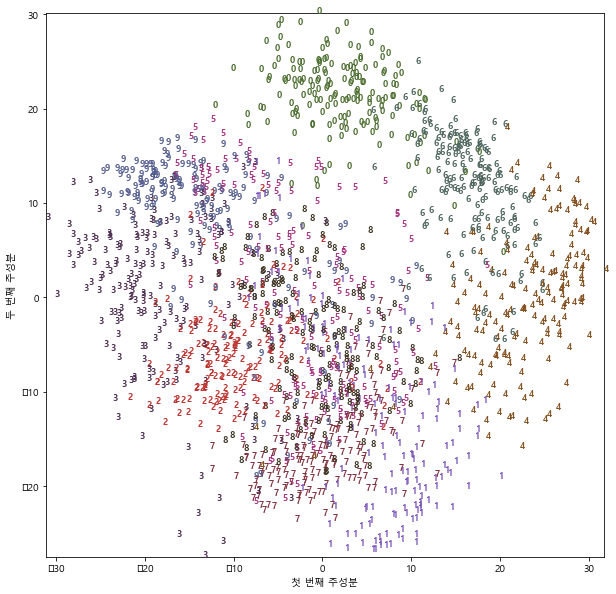

In [50]:
#위에는 각 클래스의 샘플 이미지 이다.
#처음 두 개의 주성분을 이용해 그래프를 그리고 각 샘플을 해당하는 클래스싀 숫자로
#나타내겠습니다

#PCA 모델을 생성하겠습니다
pca= PCA(n_components=2)
pca.fit(digits.data)
#처음 두 개의 주성분으로 숫자 데이터를 변환합니다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525",
         "#A83683","#4E655E","#853541","#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight' : 'bold','size':9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

Text(0, 0.5, '두 번째 주성분')

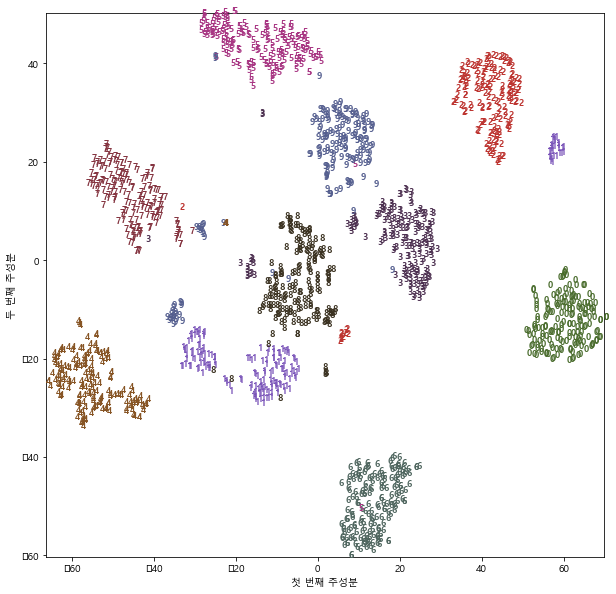

In [51]:
#pca로 구분 결과 0,6,4,는 두 개의 주성분만으로 비교적 잘 분리된 것 같다.
#이번에는 t-SNE를 적용해 결과를 비교해보자

from sklearn.manifold import TSNE
tsne = TSNE(random_state =42)
#TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight' : 'bold','size':9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [ ]:
#와우 결과는 모든 클래스가 확실히 잘 구분이 되었네요
#1과 9는 조금 나뉘었지만 대부분의 숫자는 하나의 그룹으로 모여 있습니다.
#이 알고리즘은 클래스 레이블 정보를 사용하지 않으므로 완전한 비지도 학습입니다.
#그럼에도 2차원 표현을 잘 구분시켰네요!